In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv('final_data.csv')
df.head()

,Unnamed: 0,name,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,popularity,identity,isAlive
0,0,Viserys II Targaryen,1,NaN,House Targaryen,0,0,0,0,0,0,0,NaN,11,1,0.605351,king,0
1,1,Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,0.896321,knight,1
2,2,Addison Hill,1,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0,0.267559,lord,1
3,3,Aemma Arryn,0,Valyrian,House Arryn,0,0,0,0,0,1,1,23.0,0,0,0.183946,official,0
4,4,Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0,0.043478,noble,1


In [62]:
del df['Unnamed: 0']
del df['boolDeadRelations']
del df['age']
del df['isNoble']

In [63]:
df.set_index('name',inplace=True)

In [64]:
df.head()

,male,culture,house,book1,book2,book3,book4,book5,isMarried,numDeadRelations,popularity,identity,isAlive
name,,,,,,,,,,,,,
Viserys II Targaryen,1,NaN,House Targaryen,0,0,0,0,0,0,11,0.605351,king,0
Walder Frey,1,Rivermen,House Frey,1,1,1,1,1,1,1,0.896321,knight,1
Addison Hill,1,NaN,House Swyft,0,0,0,1,0,0,0,0.267559,lord,1
Aemma Arryn,0,Valyrian,House Arryn,0,0,0,0,0,1,0,0.183946,official,0
Sylva Santagar,0,Dornish,House Santagar,0,0,0,1,0,1,0,0.043478,noble,1


In [65]:
culture_dummy=pd.get_dummies(df['culture'],prefix='Culture')
df[culture_dummy.columns]=culture_dummy
del df['culture']

In [66]:
house_dummy=pd.get_dummies(df['house'],prefix='House')
df[house_dummy.columns]=house_dummy
del df['house']

In [67]:
identity_dummy=pd.get_dummies(df['identity'])
df[identity_dummy.columns]=identity_dummy
del df['identity']
del df['lord']

In [68]:
df.shape

(1946, 384)

In [69]:
X=df.drop('isAlive',axis=1)
Y=df['isAlive']

In [70]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [71]:
X_train.head()

,male,book1,book2,book3,book4,book5,isMarried,numDeadRelations,popularity,Culture_Andal,...,House_wildling,king,knight,magician,noble,official,prince,smallfolk,smallfork,warrior
name,,,,,,,,,,,,,,,,,,,,,
Brusco,1,0,0,0,1,1,0,0,0.046823,0,...,0,0,0,0,0,0,0,1,0,0
Ezzara,0,0,0,0,0,1,0,0,0.006689,0,...,0,0,0,0,0,0,0,1,0,0
Timoth,1,0,0,0,1,0,0,0,0.006689,0,...,0,0,0,0,0,0,0,1,0,0
Wyman Manderly,1,1,1,1,1,1,0,0,0.354515,0,...,0,0,1,0,0,0,0,0,0,0
Mawney,1,0,0,1,1,1,0,0,0.023411,0,...,0,0,0,0,0,0,0,0,0,1


<h3>K_nearest neighbors algorithm</h3>

In [177]:
def validate_model(model,K,X,Y):
    folder=KFold(K,shuffle=True)
    folds=folder.split(X,Y)
    val_error=0.0
    fold_count=0
    for fold in folds:
        train_idx,val_idx=fold
        x_train=X.iloc[train_idx]
        y_train=Y.iloc[train_idx]
        x_val=X.iloc[val_idx]
        y_val=Y.iloc[val_idx]     
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        val_err=np.mean(y_val==y_pred)
        val_error+=val_err
        fold_count+=1
    return val_error/K

In [201]:
accuracy=np.array([])
for k in range(3,20):
    base_model=KNeighborsClassifier(n_neighbors=k)
    score=validate_model(base_model,5,X_train,Y_train)
    accuracy=np.append(accuracy,score)

In [202]:
best_k=accuracy.argmax()+3
best_k

19

In [203]:
best_model=KNeighborsClassifier(n_neighbors=best_k).fit(X_train,Y_train)
Y_pre=best_model.predict(X_test)
print(f'the accuracy of knn is {np.mean(Y_pre==Y_test)}')

the accuracy of knn is 0.8287671232876712


In [204]:
matrix=confusion_matrix(y_pre,Y_test)
matrix

array([[ 29,  18],
       [ 36, 209]], dtype=int64)

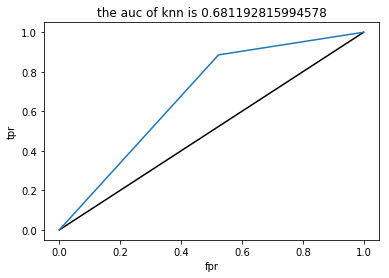

In [182]:
(fpr, tpr, thresholds) = roc_curve(Y_test,Y_pre)
area = auc(fpr,tpr)
plt.title(f'the auc of knn is {area}')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], 'k')
plt.plot(fpr,tpr)

<h3>Logistic Regression</h3>

In [212]:
accuracy=np.array([])
for c in np.arange(1,5,0.5):
    base_model=LogisticRegression(C=c)
    score=validate_model(base_model,5,X_train,Y_train)
    accuracy=np.append(accuracy,score)

In [213]:
best_c=1+accuracy.argmax()*0.5
best_c

3.0

In [214]:
best_model=LogisticRegression(C=best_c).fit(X_train,Y_train)
y_pre=best_model.predict(X_test)
print(f'the accuracy of LogisticRegression is {np.mean(y_pre==Y_test)}')

the accuracy of LogisticRegression is 0.815068493150685


In [210]:
matrix=confusion_matrix(y_pre,Y_test)
matrix

array([[ 29,  19],
       [ 36, 208]], dtype=int64)

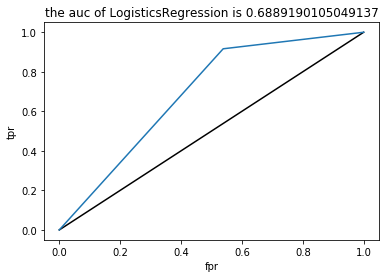

In [173]:
(fpr, tpr, thresholds) = roc_curve(Y_test,Y_pre)
area = auc(fpr,tpr)
plt.title(f'the auc of LogisticsRegression is {area}')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.plot([0, 1], [0, 1], 'k')
plt.plot(fpr,tpr)